In [1]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
 

In [2]:
df = pd.read_csv("c:/users/fadic/anaconda3/Library/lib/Untitled Folder/winequality-red.csv", delimiter=';')[1:]    # dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [3]:
#Check data with info function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 1 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1598 non-null   float64
 1   volatile acidity      1598 non-null   float64
 2   citric acid           1598 non-null   float64
 3   residual sugar        1598 non-null   float64
 4   chlorides             1598 non-null   float64
 5   free sulfur dioxide   1598 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1598 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1598 non-null   float64
 10  alcohol               1598 non-null   float64
 11  quality               1598 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


In [4]:
df.shape

(1598, 12)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1598.0,8.320213,1.741489,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1598.0,0.527713,0.179064,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1598.0,0.271145,0.194744,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1598.0,2.539205,1.410279,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1598.0,0.087474,0.047079,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1598.0,15.877972,10.462720,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1598.0,46.475594,32.904142,6.00000,22.0000,38.00000,62.000000,289.00000
density,1598.0,0.996746,0.001888,0.99007,0.9956,0.99675,0.997837,1.00369
pH,1598.0,3.310989,0.154355,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1598.0,0.658210,0.169542,0.33000,0.5500,0.62000,0.730000,2.00000


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

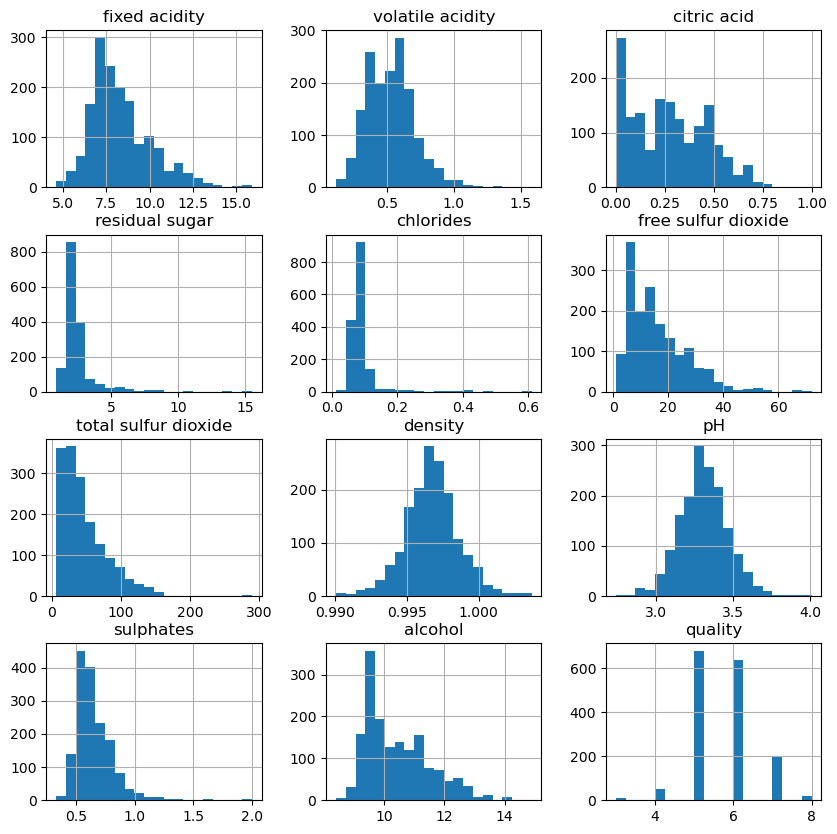

In [7]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

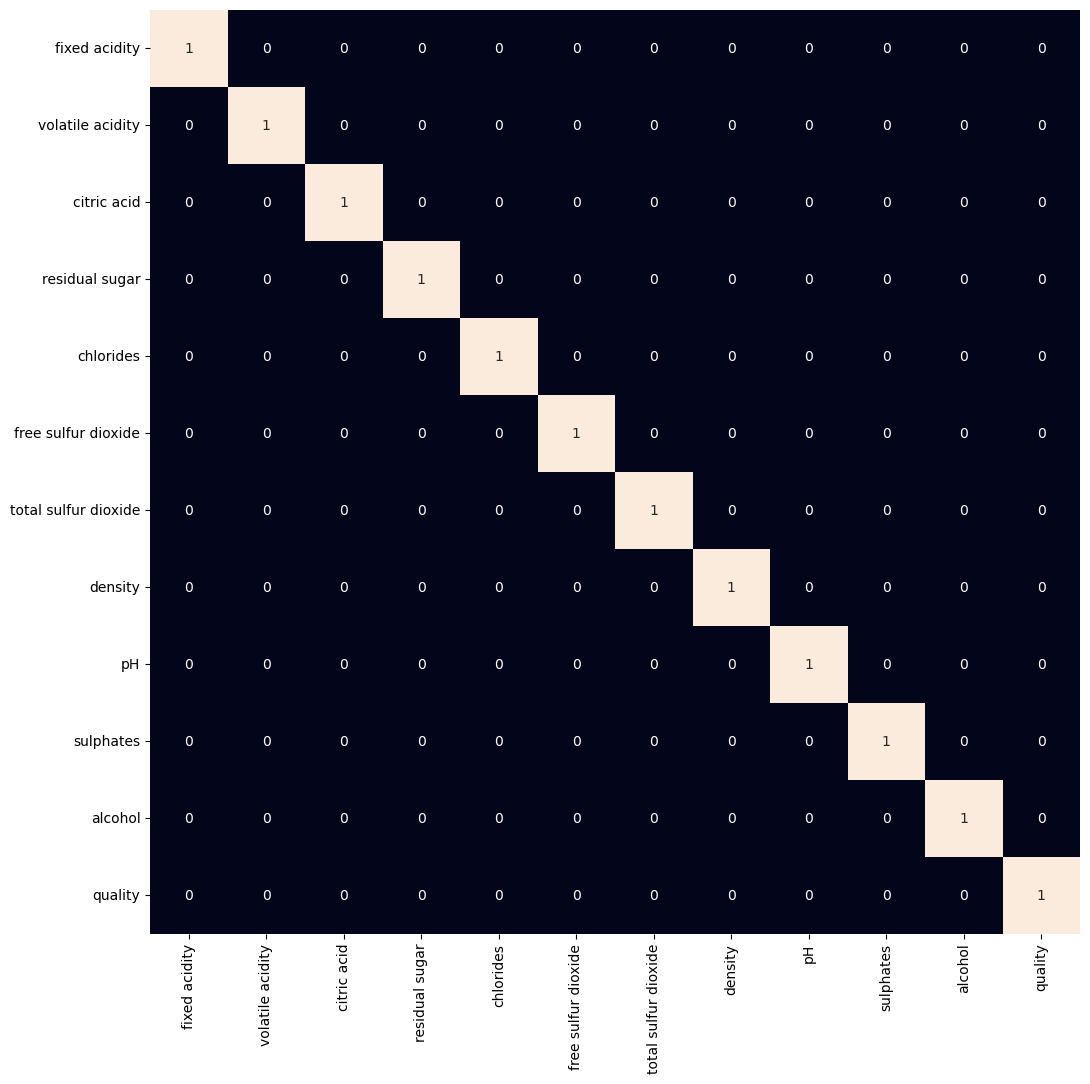

In [8]:
plt.figure(figsize=(12, 12))
sb.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [9]:
df = df.drop(columns=['total sulfur dioxide', 'free sulfur dioxide', 'volatile acidity','free sulfur dioxide','chlorides',
                     'volatile acidity','residual sugar', 'alcohol'])

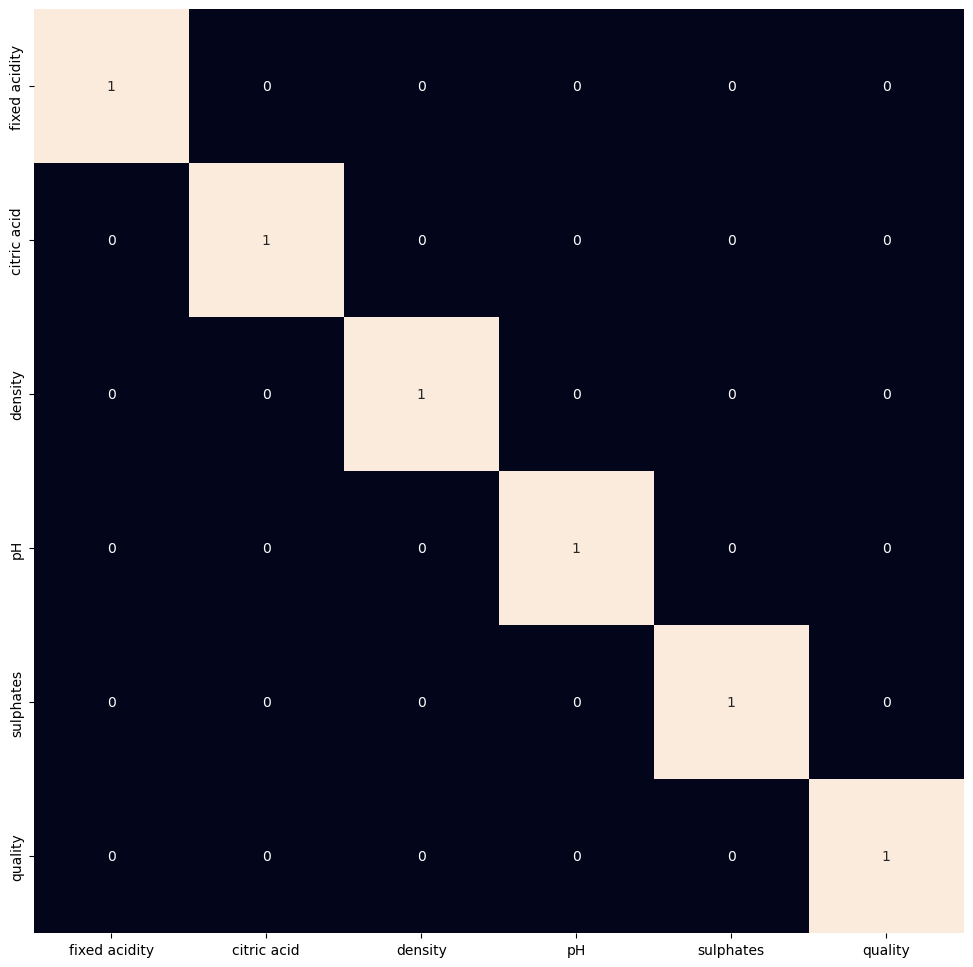

In [10]:
plt.figure(figsize=(12, 12))
sb.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [11]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

In [17]:
features = df.drop(['quality', 'best quality'], axis=1)
target = df['best quality']
 
xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.2, random_state=40)
 
xtrain.shape, xtest.shape
features

,fixed acidity,citric acid,density,pH,sulphates
1,7.8,0.00,0.99680,3.20,0.68
2,7.8,0.04,0.99700,3.26,0.65
3,11.2,0.56,0.99800,3.16,0.58
4,7.4,0.00,0.99780,3.51,0.56
5,7.4,0.00,0.99780,3.51,0.56
...,...,...,...,...,...
1594,6.2,0.08,0.99490,3.45,0.58
1595,5.9,0.10,0.99512,3.52,0.76
1596,6.3,0.13,0.99574,3.42,0.75
1597,5.9,0.12,0.99547,3.57,0.71


In [13]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)


In [14]:
models = LogisticRegression()


models.fit(xtrain, ytrain)

print(f'{models} : ')
print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models.predict(xtrain)))
print('Validation Accuracy : ', metrics.roc_auc_score(
ytest, models.predict(xtest)))
print()


LogisticRegression() : 
Training Accuracy :  0.6745827510874058
Validation Accuracy :  0.703452479257599



In [15]:
print(metrics.classification_report(ytest,models.predict(xtest)))


              precision    recall  f1-score   support

           0       0.67      0.71      0.69       147
           1       0.74      0.70      0.72       173

    accuracy                           0.70       320
   macro avg       0.70      0.70      0.70       320
weighted avg       0.71      0.70      0.70       320



In [16]:
import pickle
with open('file_week3.pkl','wb') as file:
    pickle.dump(models,file)

In [20]:
models.predict([[2, 3, 5, 4, 1]])

array([0], dtype=int64)